# Analises de todos os filmes por ano
### Usando dados de todos os filmes e analisando se foi indicado ao Oscar ou não, sem se importar se foi premiado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
import os

In [2]:
caminho_arquivo_csv = os.path.join(os.path.dirname('03 - Projeto'), '..', '..', 'datasets')
df_oscars = pd.read_csv(os.path.join(caminho_arquivo_csv, 'filmes_total.csv'))
df_oscars.drop_duplicates('Movie Name',inplace=True)
indicados = df_oscars['Movie Name'].unique()
len(indicados)

774

In [3]:
df_filmes = pd.read_csv(os.path.join(caminho_arquivo_csv,'filmes.csv'))
df_filmes.drop_duplicates(['Movie Name'],inplace=True)
df_filmes = df_filmes[df_filmes['Stars'].notna()]
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7107 entries, 0 to 7251
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movie Name             7107 non-null   object 
 1   Year of Release        7107 non-null   int64  
 2   Gross                  4973 non-null   float64
 3   Genre                  7107 non-null   object 
 4   Stars                  7107 non-null   object 
 5   media_idade            7057 non-null   float64
 6   qtd_atores             7107 non-null   float64
 7   qtd_atores_etnia       7107 non-null   float64
 8   qtd_atores_genero      7107 non-null   float64
 9   qtd_mulheres           7107 non-null   float64
 10  qtd_non_white          7107 non-null   float64
 11  variancia_idade        6931 non-null   float64
 12  porcentagem_mulheres   7034 non-null   float64
 13  porcentagem_non_white  4862 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 832.9+ KB


In [4]:
df = df_filmes[df_filmes['Year of Release'] >= 2000]
df['indicado'] = df['Movie Name'].isin(indicados)

C:\Users\yasmi\AppData\Local\Temp\ipykernel_17664\695665012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['indicado'] = df['Movie Name'].isin(indicados)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6477 entries, 0 to 7251
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movie Name             6477 non-null   object 
 1   Year of Release        6477 non-null   int64  
 2   Gross                  4395 non-null   float64
 3   Genre                  6477 non-null   object 
 4   Stars                  6477 non-null   object 
 5   media_idade            6430 non-null   float64
 6   qtd_atores             6477 non-null   float64
 7   qtd_atores_etnia       6477 non-null   float64
 8   qtd_atores_genero      6477 non-null   float64
 9   qtd_mulheres           6477 non-null   float64
 10  qtd_non_white          6477 non-null   float64
 11  variancia_idade        6310 non-null   float64
 12  porcentagem_mulheres   6409 non-null   float64
 13  porcentagem_non_white  4320 non-null   float64
 14  indicado               6477 non-null   bool   
dtypes: bool(1

In [6]:
df.groupby('Movie Name').count()

Year of Release  Gross  Genre  Stars  media_idade  \
Movie Name                                                                 
1 nenokkadine                        1      0      1      1            1   
10 cloverfield lane                  1      1      1      1            1   
10 items or less                     1      1      1      1            1   
10 years                             1      1      1      1            1   
100 feet                             1      0      1      1            1   
...                                ...    ...    ...    ...          ...   
zombieland double tap                1      1      1      1            1   
zookeeper                            1      1      1      1            1   
zoolander                            1      1      1      1            1   
zootopia                             1      1      1      1            1   
zulu                                 1      0      1      1            1   

                       qtd_atores  qtd_atores_etnia  qtd_atores_genero  \
Movie Name                                                               
1 nenokkadine                   1                 1                  1   
10 cloverfield lane             1                 1                  1   
10 items or less                1                 1                  1   
10 years                        1                 1                  1   
100 feet                        1                 1                  1   
...                           ...               ...                ...   
zombieland double tap           1                 1                  1   
zookeeper                       1                 1                  1   
zoolander                       1                 1                  1   
zootopia                        1                 1                  1   
zulu                            1                 1                  1   

                       qtd_mulheres  qtd_non_white  variancia_idade  \
Movie Name                                                            
1 nenokkadine                     1              1                1   
10 cloverfield lane               1              1                1   
10 items or less                  1              1                1   
10 years                          1              1                1   
100 feet                          1              1                1   
...                             ...            ...              ...   
zombieland double tap             1              1                1   
zookeeper                         1              1                1   
zoolander                         1              1                1   
zootopia                          1              1                1   
zulu                              1              1                1   

                       porcentagem_mulheres  porcentagem_non_white  indicado  
Movie Name                                                                    
1 nenokkadine                             1                      0         1  
10 cloverfield lane                       1                      1         1  
10 items or less                          1                      1         1  
10 years                                  1                      1         1  
100 feet                                  1                      1         1  
...                                     ...                    ...       ...  
zombieland double tap                     1                      1         1  
zookeeper                                 1                      1         1  
zoolander                                 1                      1         1  
zootopia                                  1                      1         1  
zulu                                      1                      1         1  

[6477 rows x 14 columns]

In [7]:
df = df.drop_duplicates(subset='Movie Name')
df.groupby('Movie Name').count()

Year of Release  Gross  Genre  Stars  media_idade  \
Movie Name                                                                 
1 nenokkadine                        1      0      1      1            1   
10 cloverfield lane                  1      1      1      1            1   
10 items or less                     1      1      1      1            1   
10 years                             1      1      1      1            1   
100 feet                             1      0      1      1            1   
...                                ...    ...    ...    ...          ...   
zombieland double tap                1      1      1      1            1   
zookeeper                            1      1      1      1            1   
zoolander                            1      1      1      1            1   
zootopia                             1      1      1      1            1   
zulu                                 1      0      1      1            1   

                       qtd_atores  qtd_atores_etnia  qtd_atores_genero  \
Movie Name                                                               
1 nenokkadine                   1                 1                  1   
10 cloverfield lane             1                 1                  1   
10 items or less                1                 1                  1   
10 years                        1                 1                  1   
100 feet                        1                 1                  1   
...                           ...               ...                ...   
zombieland double tap           1                 1                  1   
zookeeper                       1                 1                  1   
zoolander                       1                 1                  1   
zootopia                        1                 1                  1   
zulu                            1                 1                  1   

                       qtd_mulheres  qtd_non_white  variancia_idade  \
Movie Name                                                            
1 nenokkadine                     1              1                1   
10 cloverfield lane               1              1                1   
10 items or less                  1              1                1   
10 years                          1              1                1   
100 feet                          1              1                1   
...                             ...            ...              ...   
zombieland double tap             1              1                1   
zookeeper                         1              1                1   
zoolander                         1              1                1   
zootopia                          1              1                1   
zulu                              1              1                1   

                       porcentagem_mulheres  porcentagem_non_white  indicado  
Movie Name                                                                    
1 nenokkadine                             1                      0         1  
10 cloverfield lane                       1                      1         1  
10 items or less                          1                      1         1  
10 years                                  1                      1         1  
100 feet                                  1                      1         1  
...                                     ...                    ...       ...  
zombieland double tap                     1                      1         1  
zookeeper                                 1                      1         1  
zoolander                                 1                      1         1  
zootopia                                  1                      1         1  
zulu                                      1                      1         1  

[6477 rows x 14 columns]

# Visualização das médias

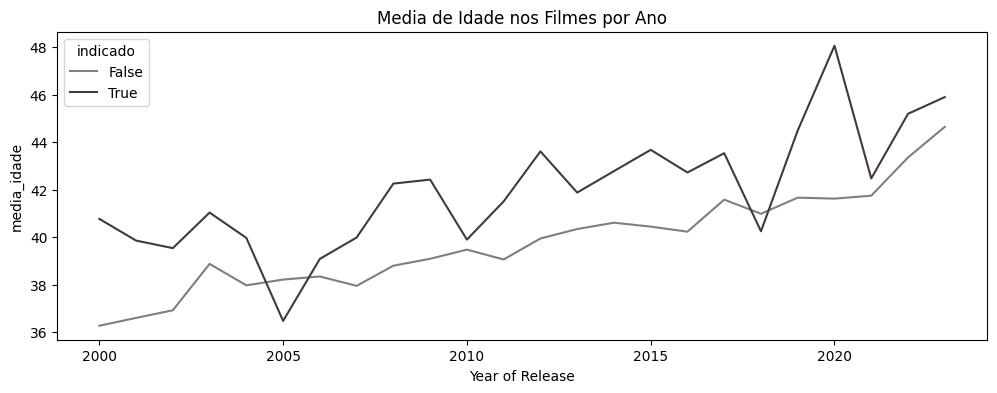

In [28]:
group = df.groupby(['Year of Release','indicado'])['media_idade'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(data=group,x='Year of Release',y='media_idade',hue='indicado',palette=('#788475','#453643'))
plt.title(f'Media de Idade nos Filmes por Ano')
plt.show()

<Figure size 1200x400 with 0 Axes>

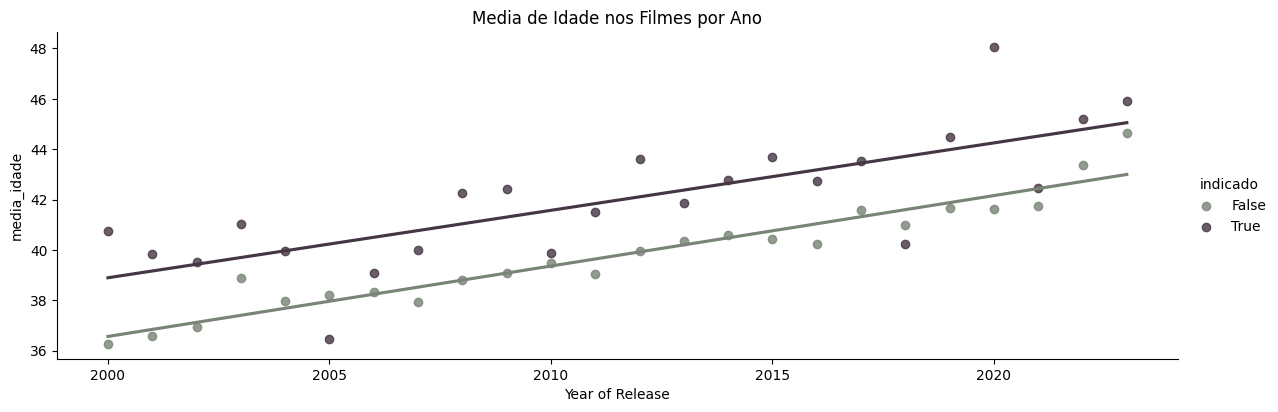

In [29]:
plt.figure(figsize=(12,4))
sns.lmplot(data=group, x='Year of Release', y='media_idade', hue='indicado', palette=('#788475', '#453643'), height=4, aspect=3, markers='o', ci=None)
plt.title(f'Media de Idade nos Filmes por Ano')
plt.show()

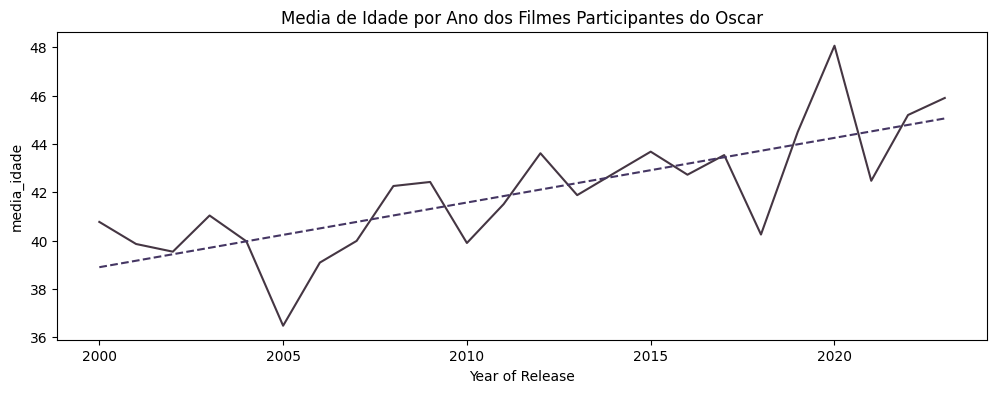

In [30]:
group = df.groupby(['Year of Release','indicado'])['media_idade'].mean().reset_index()
group = group[group['indicado']==True]

plt.figure(figsize=(12,4))
sns.lineplot(data=group,x='Year of Release',y='media_idade',color='#453643')

z = np.polyfit(group['Year of Release'], group['media_idade'], 1)
p = np.poly1d(z)
plt.plot(group['Year of Release'], p(group['Year of Release']), linestyle='--', color='#453663')

plt.title(f'Media de Idade por Ano dos Filmes Participantes do Oscar')
plt.show()

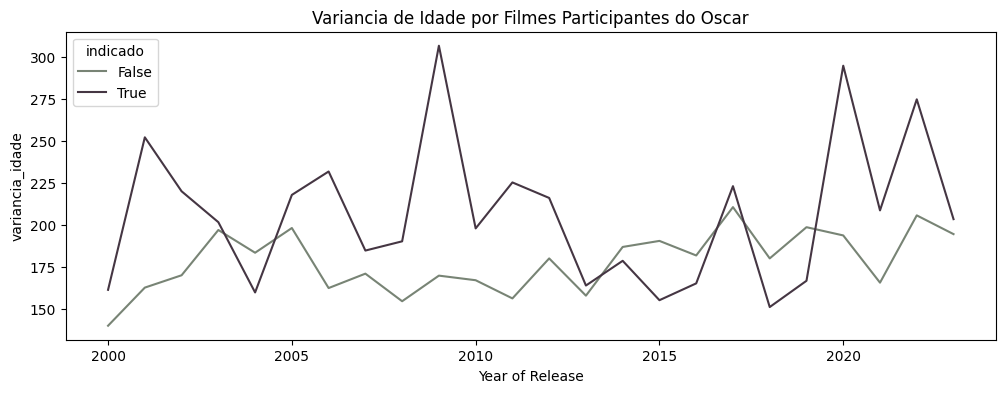

In [10]:
group = df.groupby(['Year of Release','indicado'])['variancia_idade'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(data=group,x='Year of Release',y='variancia_idade',hue='indicado',palette=('#788475','#453643'))
plt.title(f'Variancia de Idade por Filmes Participantes do Oscar')
plt.show()

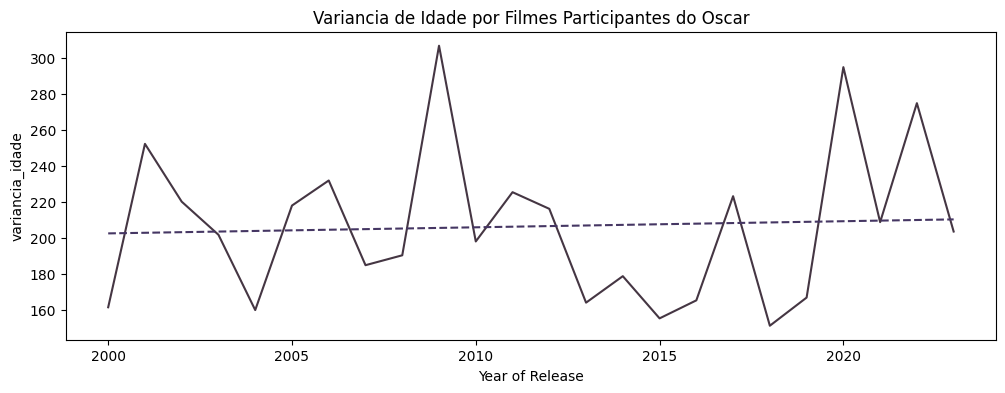

In [11]:
group = df.groupby(['Year of Release','indicado'])['variancia_idade'].mean().reset_index()
group = group[group['indicado']==True]

plt.figure(figsize=(12,4))
sns.lineplot(data=group,x='Year of Release',y='variancia_idade',color='#453643')

z = np.polyfit(group['Year of Release'], group['variancia_idade'], 1)
p = np.poly1d(z)
plt.plot(group['Year of Release'], p(group['Year of Release']), linestyle='--', color='#453663')

plt.title(f'Variancia de Idade por Filmes Participantes do Oscar')
plt.show()

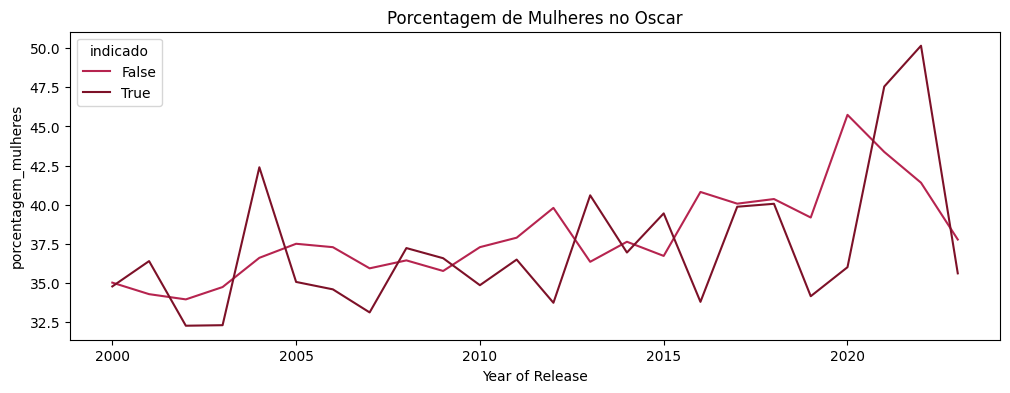

In [12]:
genero = df.groupby(['Year of Release','indicado'])['porcentagem_mulheres'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(data=genero,x='Year of Release',y='porcentagem_mulheres',hue='indicado',palette=('#B6244F','#7D1128'))
plt.title('Porcentagem de Mulheres no Oscar')
plt.show()

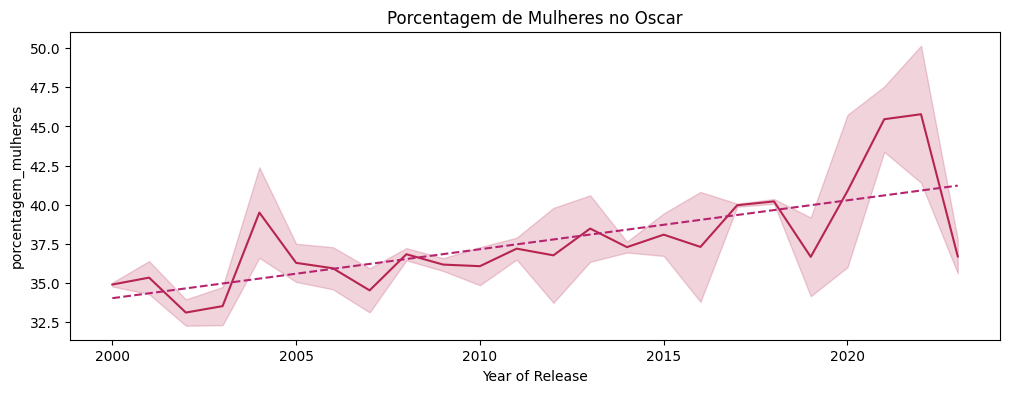

In [13]:
plt.figure(figsize=(12,4))
sns.lineplot(data=genero,x='Year of Release',y='porcentagem_mulheres',color='#B6244F')

z = np.polyfit(genero['Year of Release'], genero['porcentagem_mulheres'], 1)
p = np.poly1d(z)
plt.plot(genero['Year of Release'], p(genero['Year of Release']), linestyle='--', color='#B6246F')

plt.title('Porcentagem de Mulheres no Oscar') 
plt.show()

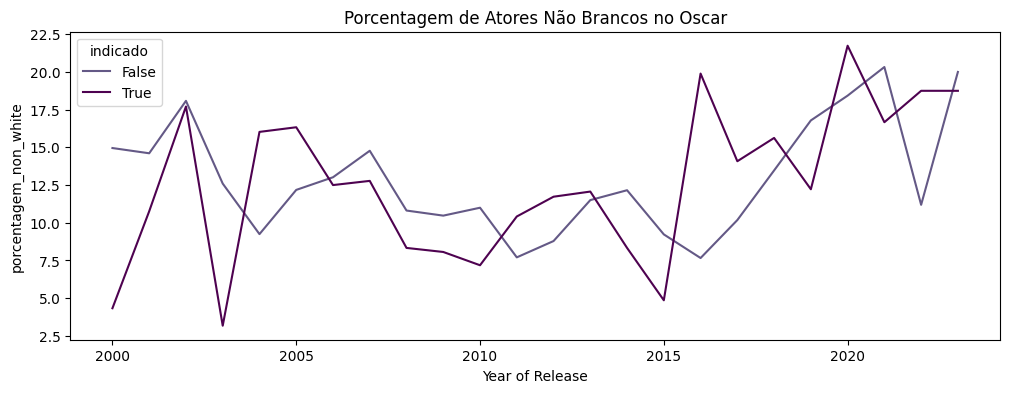

In [14]:
etnia = df.groupby(['Year of Release','indicado'])['porcentagem_non_white'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(data=etnia,x='Year of Release',y='porcentagem_non_white',hue='indicado',palette=('#645986','#4E0250'))
plt.title('Porcentagem de Atores Não Brancos no Oscar')
plt.show()

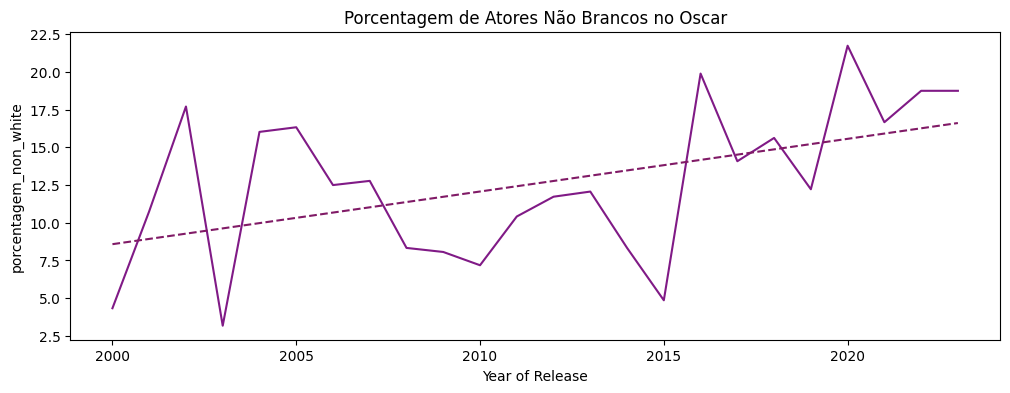

In [15]:
etnia = etnia[etnia['indicado']==True]

plt.figure(figsize=(12,4))
sns.lineplot(data=etnia,x='Year of Release',y='porcentagem_non_white',color='#801A86')

z = np.polyfit(etnia['Year of Release'], etnia['porcentagem_non_white'], 1)
p = np.poly1d(z)
plt.plot(etnia['Year of Release'], p(etnia['Year of Release']), linestyle='--', color='#801A66')

plt.title('Porcentagem de Atores Não Brancos no Oscar')
plt.show()

# Comparando Médias

## Idades

Intervalo de Confiança

In [16]:
media_idades = df.groupby('Year of Release')['media_idade'].mean().mean() # media das médias por ano

intervalo = sms.DescrStatsW(df.groupby(['Year of Release'])['media_idade'].mean()).tconfint_mean()
print(f' Media: {media_idades} \n Intervalo: {intervalo}')

 Media: 40.05211319469202 
 Intervalo: (39.19949497060655, 40.90473141877749)


Como a diferença não pode ser 0 e o valor de P é baixo, podemos afirmar que a média da idade entre os indicados e premiados é diferente

In [17]:
df_p = df.groupby(['Year of Release','indicado'])['media_idade'].mean().reset_index()
df_w = df_p[df_p['indicado']==True]
df_i = df_p[df_p['indicado']==False]

comp = sms.CompareMeans(sms.DescrStatsW(df_w['media_idade']), sms.DescrStatsW(df_i['media_idade'])) # diferença entre os intervalos
comp.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

## Porcentagem de Mulheres

Intervalo de confiança

In [18]:
media_idades = df.groupby('Year of Release')['porcentagem_mulheres'].mean().mean() # media das médias por ano

intervalo = sms.DescrStatsW(df.groupby(['Year of Release'])['porcentagem_mulheres'].mean()).tconfint_mean()
print(f' Media: {media_idades} \n Intervalo: {intervalo}')

 Media: 37.906440691632405 
 Intervalo: (36.71346750955333, 39.09941387371148)


Como a diferença pode ser 0 e o valor de P é alto, não podemos afirmar que a média da porcentagem de mulheres entre os indicados e premiados é diferente

In [19]:
df_p = df.groupby(['Year of Release','indicado'])['porcentagem_mulheres'].mean().reset_index()
df_w = df_p[df_p['indicado']==True]
df_i = df_p[df_p['indicado']==False]

comp = sms.CompareMeans(sms.DescrStatsW(df_w['porcentagem_mulheres']), sms.DescrStatsW(df_i['porcentagem_mulheres'])) # diferença entre os intervalos
comp.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

## Porcentagem de Não Brancos

Intervalo de confiança

In [20]:
media_idades = df.groupby('Year of Release')['porcentagem_non_white'].mean().mean() # media das médias por ano

intervalo = sms.DescrStatsW(df.groupby(['Year of Release'])['porcentagem_non_white'].mean()).tconfint_mean()
print(f' Media: {media_idades} \n Intervalo: {intervalo}')

 Media: 12.826163728207723 
 Intervalo: (11.36594389425195, 14.286383562163488)


Como a diferença pode ser 0 e o valor de P é alto, não podemos afirmar que a média da porcentagem de atores não brancos entre os indicados e premiados é diferente

In [21]:
df_p = df.groupby(['Year of Release','indicado'])['porcentagem_non_white'].mean().reset_index()
df_w = df_p[df_p['indicado']==True]
df_i = df_p[df_p['indicado']==False]

comp = sms.CompareMeans(sms.DescrStatsW(df_w['porcentagem_non_white']), sms.DescrStatsW(df_i['porcentagem_non_white'])) # diferença entre os intervalos
comp.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

# Relevância

In [22]:
df['nulos_etnia'] = df['qtd_atores'] - df['qtd_atores_etnia']
df['nulos_genero'] = df['qtd_atores'] - df['qtd_atores_genero']

In [23]:
media_nulos_etnia = df['nulos_etnia'].mean()
media_nulos_genero = df['nulos_genero'].mean()

print('Media de Nulos Etnia',media_nulos_etnia)
print('Media de Nulos Genero',media_nulos_genero)

Media de Nulos Etnia 2.1193453759456538
Media de Nulos Genero 0.16967731974679637
